**3.(a) Visualization of data**

In [42]:
#importing required libraries 
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [43]:
#reading PCA data from given link
p_data= pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataPCA.csv')
p_data.head()


,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


In [44]:
#checking data types
print(p_data.dtypes)


x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
x6    float64
x7    float64
dtype: object


**Observation:** All data are float type.

In [45]:
#checking whether there are null entries or not 
for col in p_data.columns.values:
   vals = pd.unique(p_data[col])
   print(col + ' has ' + str(len(vals)) + ' unique values and '+ str(p_data[col].isnull().sum()) + ' null entries')
   if len(vals) < 20:
     lst_str=''
     for n in range(0, len(vals)):
       lst_str= lst_str + str(vals[n]) + ','

x1 has 190 unique values and 0 null entries
x2 has 190 unique values and 0 null entries
x3 has 190 unique values and 0 null entries
x4 has 190 unique values and 0 null entries
x5 has 190 unique values and 0 null entries
x6 has 190 unique values and 0 null entries
x7 has 190 unique values and 0 null entries


**Observation:** There are no null entries.

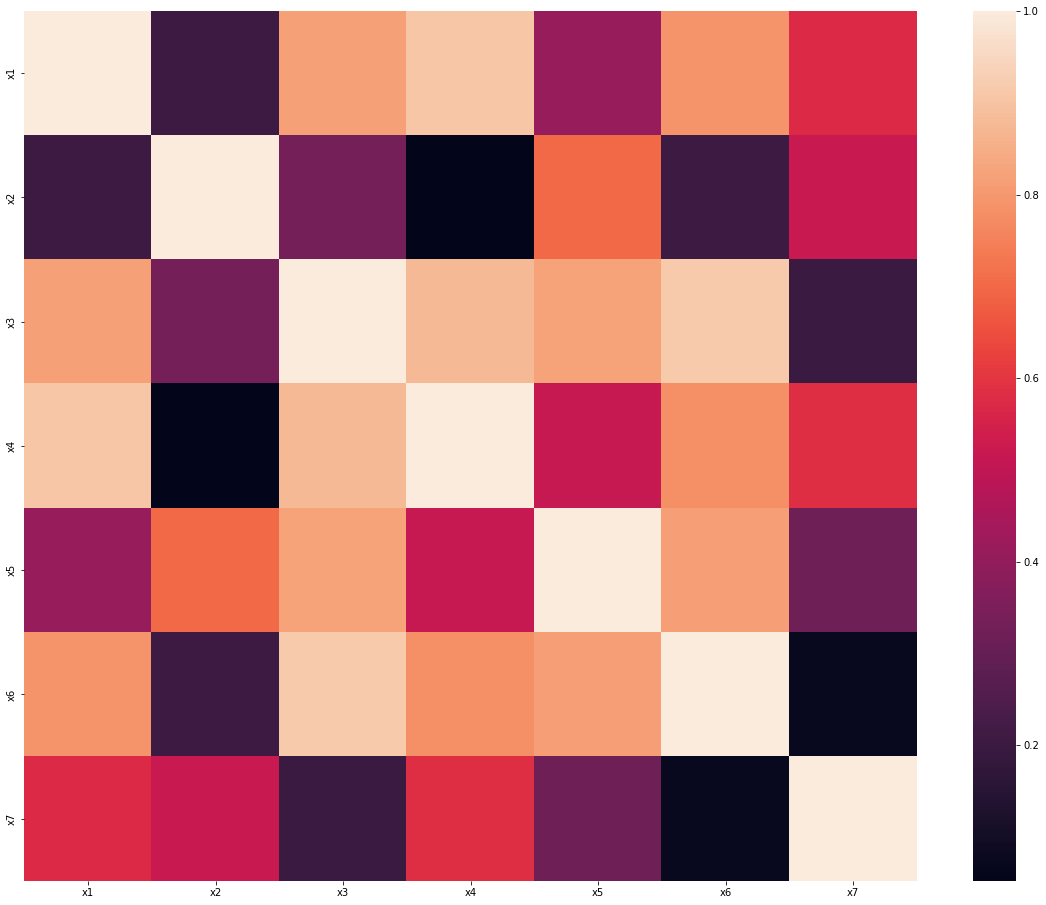

In [46]:
#plotting heatmap for correlation matrix
corrMatrix = p_data.corr(method='spearman')
fig, ax= plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix), annot=False)
plt.show()

**Observation:**
There is no co-relation between the features.

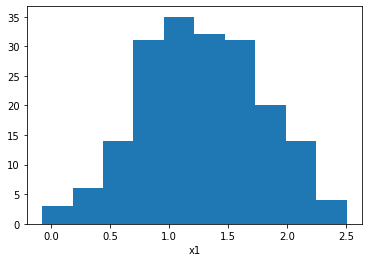

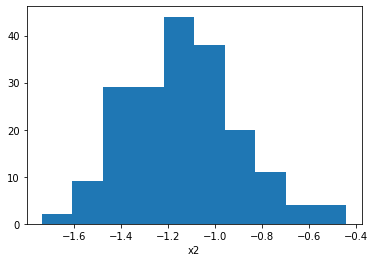

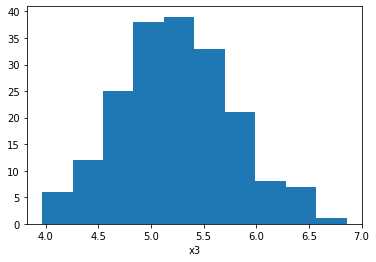

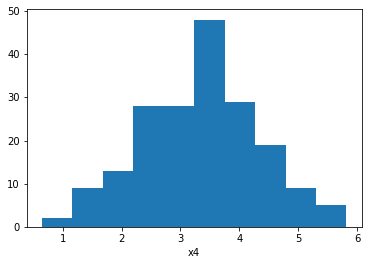

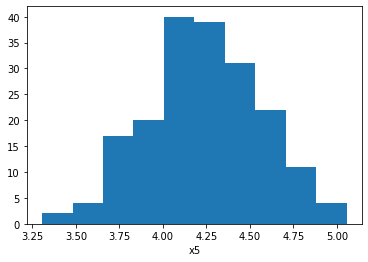

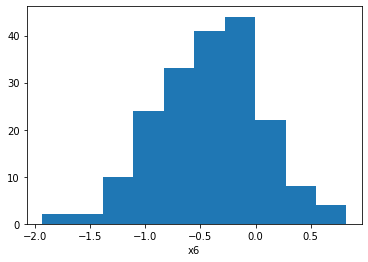

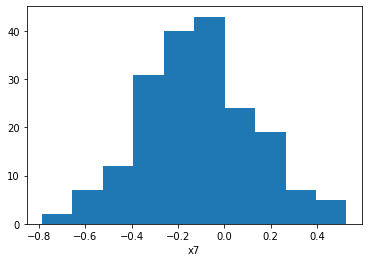

In [47]:
#plotting histogram to check distribution of data 
for col in p_data.columns.values:
  if (p_data[col].dtypes == 'float64')| (p_data[col].dtypes == 'object'):
    plt.hist(p_data[col])
    plt.xlabel(col)
    plt.show()

**Observation:**
All data variables are  following normal distribution. And, standard scalar is used for normal distribution. 

In [48]:
#data is scaled by using standard scalar 
scaling = StandardScaler()
coln_names = ['x1','x2','x3','x4','x5','x6','x7']
p_data_scaled = p_data.copy()
variables= p_data_scaled[coln_names]
p_data_scaled[coln_names] = scaling.fit_transform(variables.values)
p_data_scaled

,x1,x2,x3,x4,x5,x6,x7
0,-0.879702,0.203581,-0.717812,0.937130,0.240310,0.572178,0.817830
1,0.066901,-0.164833,-0.013778,-0.047812,0.151606,0.102283,-0.215624
2,0.495178,-0.172416,0.550176,0.052044,-0.800676,-0.988900,0.835247
3,-1.819170,0.021640,-1.688840,2.220573,0.934360,1.570859,1.551955
4,0.554357,0.089743,0.524348,-0.855438,-0.236998,-0.409231,-0.720773
...,...,...,...,...,...,...,...
185,-0.773213,-0.576244,-1.161643,0.667887,1.224821,1.183561,-0.402035
186,-0.709632,-0.290830,-0.892252,0.569165,0.929327,1.011354,-0.329898
187,0.772651,-0.392573,0.655262,-0.481353,-0.572374,-1.026142,0.083640
188,0.801322,-0.804456,0.393756,-0.321174,-0.077670,-0.584359,-0.292914


**3.(b) Training of PCA**

In [49]:
#training PCA algorithm
from sklearn.decomposition import PCA

pca = PCA()
p_data_scaled = pca.fit_transform(p_data_scaled)

In [50]:
#calculation of explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.09270567e-01, 3.19460967e-01, 6.49562011e-02, 6.07238580e-03,
       2.16027661e-04, 1.98460843e-05, 4.00494511e-06])

**Observation:**
By looking at explained variance values it can be seen that 2 PCA dimensions are sufficient to explain data.

In [51]:
#scaling data after PCA dimension reduction
pca = PCA(n_components=2)
p_data_scaled_train = pca.fit_transform(p_data_scaled)


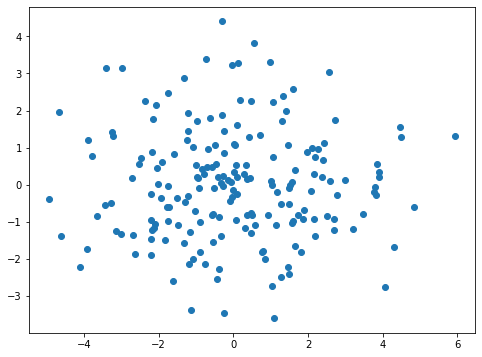

In [52]:
#plotting pair-wise scatter plot
plt.figure(figsize=(8,6))
plt.scatter(p_data_scaled_train[:,0],p_data_scaled_train[:,1])


**3.(c) Plot for variance explained versus PCA dimensions**

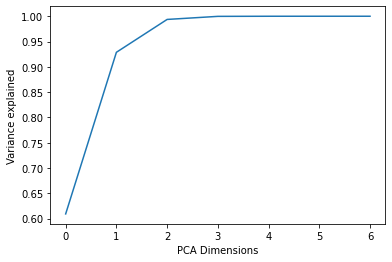

In [53]:
import numpy as np
plt.plot(np.cumsum(explained_variance))
plt.xlabel('PCA Dimensions')
plt.ylabel('Variance explained');

**Observation:**
Using only 2 PCA dimensions, we are getting 92.87% variance explained for whole data.

**3.(d) Reconstruction of the data with various numbers of PCA dimensions, and computation of the 
MSE**

In [54]:
#importing decomposition for reconstruction of the data
import sklearn.decomposition

avg = np.mean(p_data, axis=0)

pca = sklearn.decomposition.PCA()
pca.fit(p_data)

PCA()

In [55]:
#reconstruction with PCA dimension 1
pca_dim_no = 1
pca_data_reconstructed = np.dot(pca.transform(p_data)[:,:pca_dim_no], pca.components_[:pca_dim_no,:])
pca_data_reconstructed += avg

print(pca_data_reconstructed[0,])

[ 0.86677383 -1.15305581  4.79880433  4.19955326  4.41841592 -0.04480441
 -0.01550705]


In [56]:
#printing mean squared error
MSE_reconstructed_data= ((pca_data_reconstructed[0,]-avg)*(pca_data_reconstructed[0,]-avg))/7
MSE_reconstructed_data

x1    0.025184
x2    0.000043
x3    0.029718
x4    0.104933
x5    0.004871
x6    0.019360
x7    0.001532
dtype: float64

In [57]:
#reconstruction with PCA dimension 2
pca_dim_no = 2
pca_data_reconstructed = np.dot(pca.transform(p_data)[:,:pca_dim_no], pca.components_[:pca_dim_no,:])
pca_data_reconstructed += avg

print(pca_data_reconstructed[0,])

[ 0.82503126 -1.07500521  4.86773628  4.26372351  4.31215939 -0.12396265
  0.07175024]


In [58]:
#printing mean squared error
MSE_reconstructed_data= ((pca_data_reconstructed[0,]-avg)*(pca_data_reconstructed[0,]-avg))/7
MSE_reconstructed_data

x1    0.030441
x2    0.000526
x3    0.021414
x4    0.121235
x5    0.000878
x6    0.011929
x7    0.005201
dtype: float64

In [59]:
#reconstruction with PCA dimension 3
pca_dim_no = 3
pca_data_reconstructed = np.dot(pca.transform(p_data)[:,:pca_dim_no], pca.components_[:pca_dim_no,:])
pca_data_reconstructed += avg

print(pca_data_reconstructed[0,])

[ 0.83815281 -1.08975748  4.86681858  4.27423322  4.31469273 -0.13749225
  0.07503024]


In [60]:
#printing mean squared error
MSE_reconstructed_data= ((pca_data_reconstructed[0,]-avg)*(pca_data_reconstructed[0,]-avg))/7
MSE_reconstructed_data

x1    0.028735
x2    0.000301
x3    0.021516
x4    0.124017
x5    0.000936
x6    0.010839
x7    0.005381
dtype: float64

**References:**

1.https://www.youtube.com/watch?v=Ato-hcv0NK0&list=PLZKhx5nBXhfhL28m4mjIM5kSwh5gUV2k6&index=3

2.https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

3.https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

4.https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.image.reconstruct_from_patches_2d.html